<a href="https://colab.research.google.com/github/Heity94/TWSM_Lab/blob/main/Homework/9_Social_Graphs/HW_PH_Mining_Social_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 8 - Social Graphs

In [1]:
#imports
!pip install tweet-preprocessor
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
from preprocessor.api import clean

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Load tweet data
sotu_retweets = pd.read_csv("https://assets.datacamp.com/production/repositories/2161/datasets/51e79668580cdb86969c2c625172eaed2ded684a/sotu2018-rt.csv")

In [3]:
# Filter for Fox
sotu_retweets_Fox = sotu_retweets[(sotu_retweets["user-screen_name"]=="FoxNews")|(sotu_retweets["retweeted_status-user-screen_name"]=="FoxNews")].copy()

How many times was FoxNews retweeted and how many times did they retweet some
other user? 

In [4]:
#check columns
sotu_retweets_Fox.columns

Index(['contributors', 'coordinates', 'created_at', 'extended_entities',
       'favorite_count', 'favorited', 'filter_level', 'geo', 'id', 'id_str',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
       'possibly_sensitive', 'quote_count',
       'quoted_status-extended_tweet-full_text', 'quoted_status-text',
       'quoted_status-user-screen_name', 'quoted_status_id',
       'quoted_status_id_str', 'reply_count', 'retweet_count', 'retweeted',
       'retweeted_status-extended_tweet-full_text', 'retweeted_status-text',
       'retweeted_status-user-screen_name', 'source', 'text', 'timestamp_ms',
       'truncated', 'user-screen_name', 'withheld_in_countries'],
      dtype='object')

In [5]:
#Check sample rows
pd.set_option('display.max_columns', None)
sotu_retweets_Fox.sample(2)

,contributors,coordinates,created_at,extended_entities,favorite_count,favorited,filter_level,geo,id,id_str,in_reply_to_screen_name,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,is_quote_status,lang,place,possibly_sensitive,quote_count,quoted_status-extended_tweet-full_text,quoted_status-text,quoted_status-user-screen_name,quoted_status_id,quoted_status_id_str,reply_count,retweet_count,retweeted,retweeted_status-extended_tweet-full_text,retweeted_status-text,retweeted_status-user-screen_name,source,text,timestamp_ms,truncated,user-screen_name,withheld_in_countries
1205,NaN,NaN,Wed Jan 31 02:23:59 +0000 2018,NaN,0,False,low,NaN,958526243493773314,958526243493773314,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,".@POTUS: ""A typical family of four making $75,...",".@POTUS: ""A typical family of four making $75,...",FoxNews,"<a href=""http://twitter.com/download/iphone"" r...","RT @FoxNews: .@POTUS: ""A typical family of fou...",1517365439662,False,FoltFirstLady,NaN
198,NaN,NaN,Wed Jan 31 03:17:08 +0000 2018,NaN,0,False,low,NaN,958539619162886144,958539619162886144,NaN,NaN,NaN,NaN,NaN,False,en,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0,0,False,".@POTUS: ""Our plan closes the terrible loophol...",".@POTUS: ""Our plan closes the terrible loophol...",FoxNews,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","RT @FoxNews: .@POTUS: ""Our plan closes the ter...",1517368628670,False,jackson5213,NaN


In [6]:
# Number of times Fox was retweeted
sotu_retweets_Fox[(sotu_retweets_Fox["retweeted_status-user-screen_name"]=="FoxNews")].shape[0]

128

In [7]:
# Number of times Fox retweeted some other usr
sotu_retweets_Fox[(sotu_retweets_Fox["user-screen_name"]=="FoxNews")].shape[0]

1

In [8]:
# Lets check which user Fox retweeted
sotu_retweets_Fox[(sotu_retweets_Fox["user-screen_name"]=="FoxNews")].loc[:,"retweeted_status-user-screen_name"]

2144    FoxBusiness
Name: retweeted_status-user-screen_name, dtype: object

## Part A

In [9]:
# Create graph: source node: user name original tweet to user name from retweet
G_rt = nx.from_pandas_edgelist(sotu_retweets_Fox, 
                               source ='retweeted_status-user-screen_name', 
                               target = 'user-screen_name', 
                               create_using = nx.DiGraph())

In [10]:
print("Number of nodes:", len(G_rt.nodes()))
print("Number of edges:", len(G_rt.edges()))

Number of nodes: 130
Number of edges: 129


- The number of nodes are the sum of all the users who either retweeteded FoxNews (128) or were retweeted by FoxNews (1) + 1 additional node (==FoxNews)
- The number of edges is equal to the number of retweets (no of rows) in the dataset

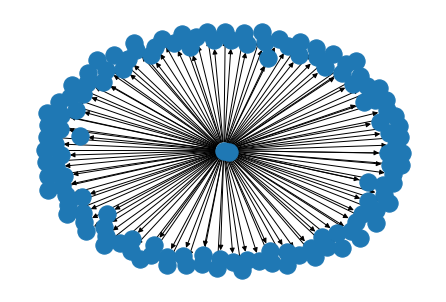

In [11]:
# Lets draw the graph
nx.draw(G_rt)

Question: What is the degree of the node ‘FoxNews’ and what does it stand for?

In [12]:
G_rt.degree("FoxNews")

129

☝ The node degree is the number of edges adjacent to that node

## Part B

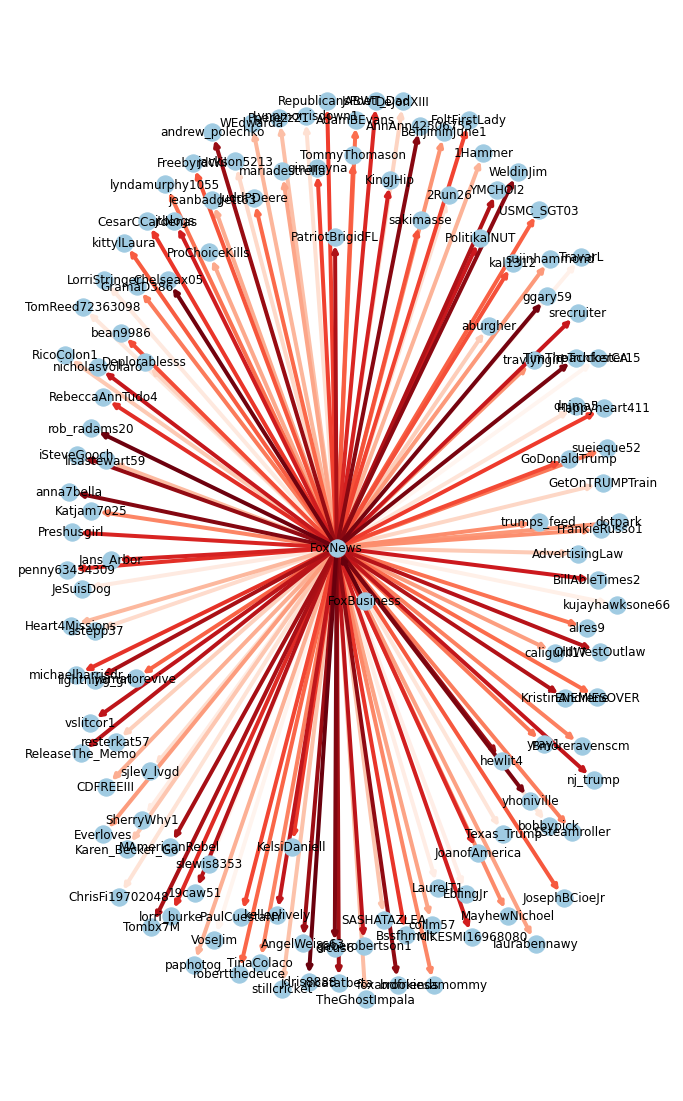

In [13]:
plt.figure(figsize=(12,20)) 
pos = nx.spring_layout(G_rt,k=0.20,iterations=20)
colors = range(129)
nx.draw_networkx(G_rt,pos,arrows=True, node_color='#A0CBE2',
edge_color=colors, width=4, edge_cmap=plt.cm.Reds, with_labels=True)
plt.axis('off')
plt.show()

- Creates visual representation of the graph
- All the directed edges (from the original tweet to the user who retweeted) 
- The color of the different edges was assigned randomly (probably for better visualization)
- In the center we see the one time FoxNews actually retweeted someone else

## Part C

In [14]:
# Create graph: source node: user name original tweet to user name from retweet
G_rt_full = nx.from_pandas_edgelist(sotu_retweets, 
                               source ='retweeted_status-user-screen_name', 
                               target = 'user-screen_name', 
                               create_using = nx.DiGraph())

The top five users who were retweeted the most in the whole network

In [15]:
out_cent = nx.out_degree_centrality(G_rt_full)
sorted(out_cent.items(), key=lambda item: item[1], reverse=True)[:5]

[('FoxNews', 0.05599300087489064),
 ('WhiteHouse', 0.031058617672790903),
 ('ScottPresler', 0.029746281714785654),
 ('TomiLahren', 0.01968503937007874),
 ('KyleKulinski', 0.01706036745406824)]

The top five users who retweeted other users the most

In [16]:
in_cent = nx.in_degree_centrality(G_rt_full)
sorted(in_cent.items(), key=lambda item: item[1], reverse=True)[:5]

[('nljac000', 0.0021872265966754157),
 ('thedreadedaw', 0.0017497812773403325),
 ('debra_bonanno', 0.0017497812773403325),
 ('aedaw9i', 0.0017497812773403325),
 ('SteveJa39296543', 0.0017497812773403325)]

## Part D

Determine the betweenness centrality using `nx.betweenness_centrality()` and store the result in rt_centrality. Show the top five users with the highest betweenness centrality.
What is their role in the network?

In [17]:
rt_centrality = nx.betweenness_centrality(G_rt_full)

In [18]:
sorted(rt_centrality.items(), key=lambda item: item[1], reverse=True)[:5]

[('FoxNews', 2.5653248486171177e-05),
 ('Public_Citizen', 9.189223338329973e-06),
 ('ChristiChat', 5.16893812781061e-06),
 ('guypbenson', 4.594611669164987e-06),
 ('johncardillo', 4.020285210519363e-06)]

- These users have the highest betweenness centrality (so highest sum of the fraction of all-pairs shortest paths that pass through that node)
- This means that these users are the most influental in the network, as most of the users have to pass them

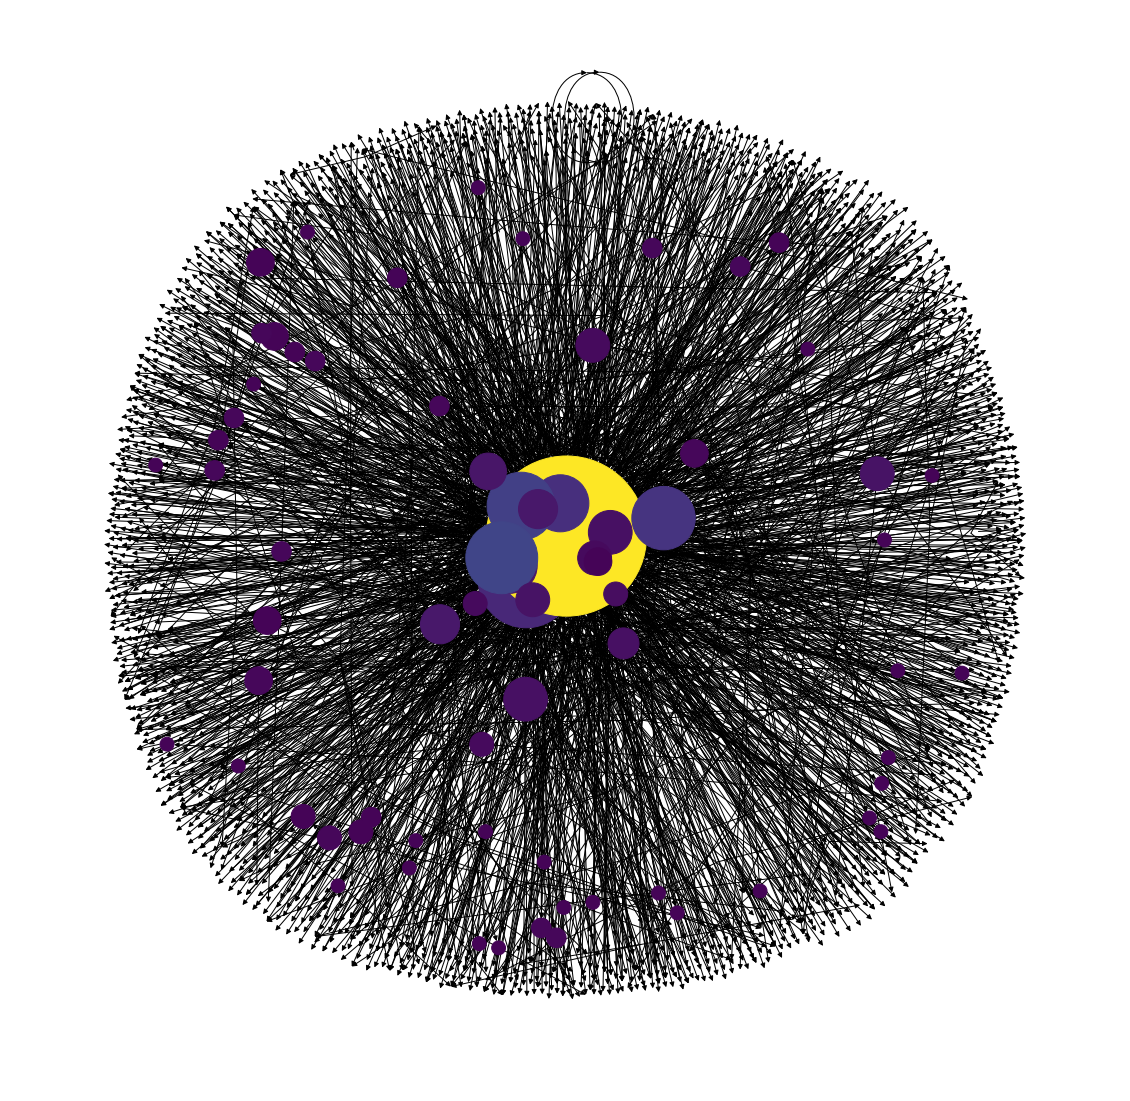

In [19]:
node_color = [200000000.0 * G_rt_full.out_degree(v) for v in G_rt_full]
node_size = [v * 1000000000 for v in rt_centrality.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(G_rt_full, with_labels=False,node_color=node_color,
node_size=node_size )
plt.axis('off')
plt.show()

In [32]:
# Which user is the yellow node: FoxNews
import numpy as np 
idx_node = np.argmax([G_rt_full.out_degree(v) for v in G_rt_full])
list(G_rt_full.nodes())[idx_node]

'FoxNews'

- **Color of nodes:** Related to the number of edges pointing out of the node (the higher the bigger the node in the plot)
- **Size of node:** Related to the betweenness centrality of a node (sum of the fraction of all-pairs shortest paths that pass through that node)
- Which user is the yellow node: FoxNews
- Which user is the biggest node: Also the yellow node

## Optional
Generate a word cloud with the most common words in all Tweets from
sotu_retweets_Fox.text. Clean the text before that appropriately and join all Tweets in
all_te

In [21]:
from preprocessor.api import clean

In [22]:
#use tweet preprocessor to preprocess this text
sotu_retweets_Fox['prep']=[clean(doc) for doc in sotu_retweets_Fox['text']]

In [23]:
# Join all tweets and store clean text
all_text = " ".join(sotu_retweets_Fox.prep.to_list())

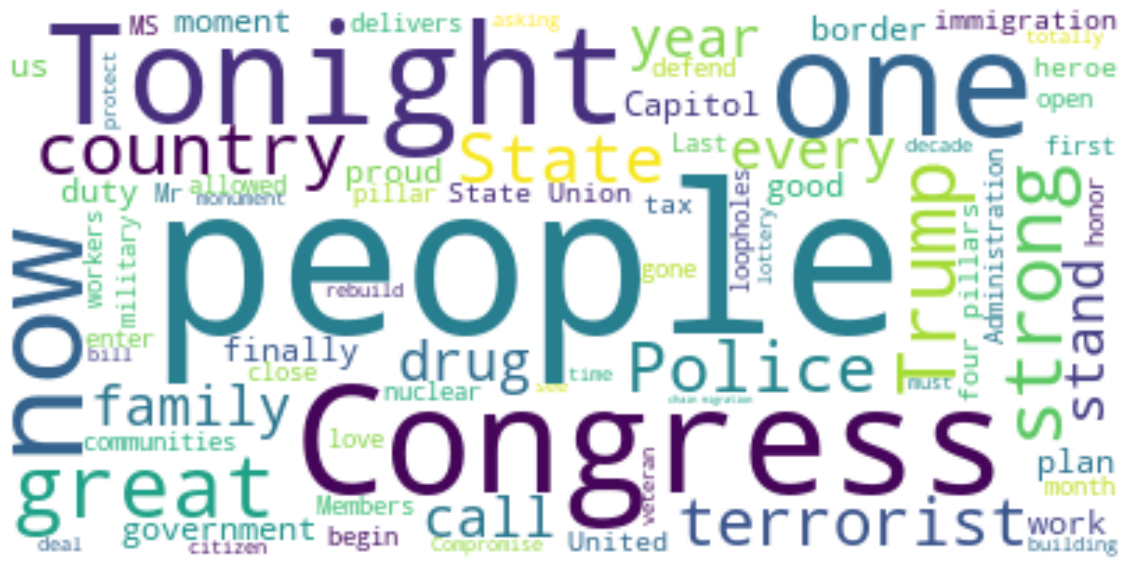

In [24]:
stopwords = set(STOPWORDS)
stopwords.update(["https", "amp", "america", "american", "americans", "president", "will", "address", "new"])
plt.figure(figsize=(20,20))
wordcloud = WordCloud(stopwords=stopwords,
background_color="white").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()